In [4]:
!pip install pandas scikit-learn matplotlib seaborn


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


Mean Squared Error: 0.1809891891891892
R^2 Score: 0.15507519181585672


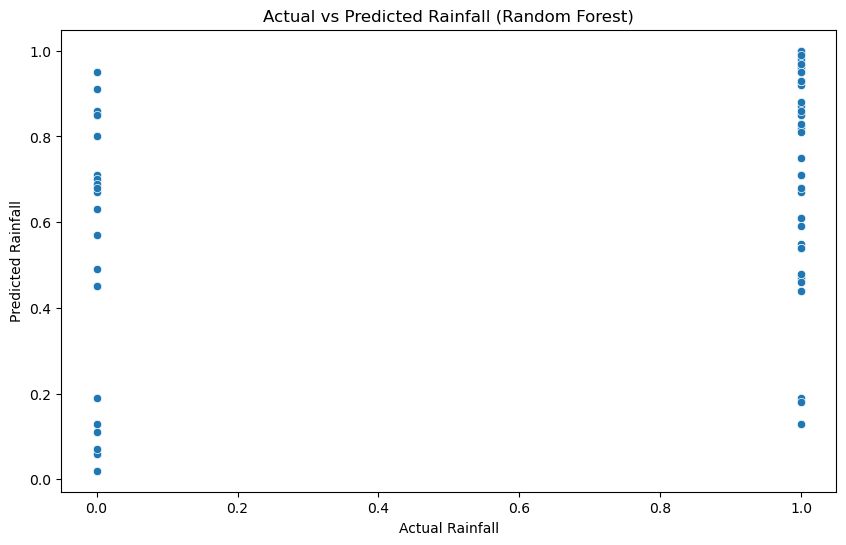

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('C:\\Users\\dell\\Downloads\\dataset1.csv')

# Separate features and target variable
X = data.drop(columns=['rainfall'])
y = data['rainfall']

# Check if target variable is categorical and convert to numeric
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)

# Drop rows with missing values if necessary
data_clean = data.dropna()

# Separate features and target again after cleaning
X = data_clean.drop(columns=['rainfall'])
y = data_clean['rainfall']

# Encode categorical target variable if necessary
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plotting the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Rainfall')
plt.ylabel('Predicted Rainfall')
plt.title('Actual vs Predicted Rainfall (Random Forest)')
plt.show()


